In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Lo scopo di questa esercitazione è stato quello di eseguire una simulazione di dinamica molecolare su un sistema isolato di molecole interagenti la cui interazione è descritta dal modello empirico di Lennard-Jones.  Il codice fornito esegue una simulazione con $N=108$ particelle la cui distribuzione spaziale di partenza è indicata in un file (<font face="Courier">config.0</font>) e acquisendo i parametri di temperatura e di densità spaziale. Le paticelle vengono mosse una alla volta grazie  all'algoritmo di Verlet e le posizioni finali sono scritte in un file di output. In oltre l'arlgoritmo esegue le misure istantanee di energia interna, energia potenziale, energia cinetica e temperatura del sistema tutte in unità ridotte. 

Il primo scopo di questa esercitazione è stato quello di implemare il codice aggiungendo la possibilità di far partire la simulazione dalle ultime posizioni salvate. Successivamente è stato aggiunto il calcolo della pressione interna ed è stato implementato il metodo dei blocchi per la stima delle incertezze statistiche di tutte le grandezze ($<E/N>$, $<U/N>$, $<K/N>$, $<T>$ $<P>$).
Da ultimo sono stati prodotti i grafici di queste grandezze medie (con le relative incertezze) per due elementi: Argon e Krypton, nelle fasi solida, liquida e gassosa.

Prima di acquisire le varie misure, è stata operata una iniziale fase di ottimizzazione in cui sono state fatte alcune simulazioni facendo partire l'algoritmo dalle ultime posizioni salvate, con lo scopo di ottenere un sistema la cui temperatura fosse il più simile possibile alla temperatura scelta come parametro. Il grafico seguente mostra i valori medi della temperatura per ogni simulazione in funzione del numero di blocchi. Si può notare come ogni volta che l'algoritmo riparte dalle precendenti posizioni la temperatura media si avvicina alla temperatura desiderata di $0.8$ (come esempio portiamo il grafico delle simulazioni fatte nel caso della fase solida)

In [2]:
T0=pd.read_csv('solid/temp_equil_1',sep=' ',header=None)
T1=pd.read_csv('solid/temp_equil_2',sep=' ', header=None)
T2=pd.read_csv('solid/temp_equil_3',sep=' ', header=None)
T3=pd.read_csv('solid/temp_equil_4',sep=' ', header=None)
T4=pd.read_csv('solid/temp_equil_5',sep=' ', header=None)

blocks=[]
for i in range (0, 50):
    blocks.append(i+1)

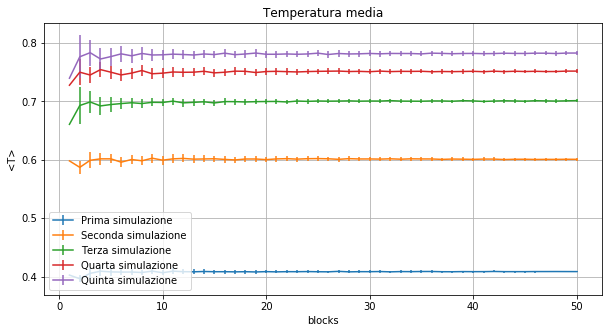

In [3]:
plt.figure(figsize=(10,5))
plt.errorbar(blocks, list(T0.iloc[:,0]), yerr=list(T0.iloc[:,1]), label='Prima simulazione')
plt.errorbar(blocks, list(T1.iloc[:,0]), yerr=list(T1.iloc[:,1]), label='Seconda simulazione')
plt.errorbar(blocks, list(T2.iloc[:,0]), yerr=list(T2.iloc[:,1]), label='Terza simulazione')
plt.errorbar(blocks, list(T3.iloc[:,0]), yerr=list(T3.iloc[:,1]), label='Quarta simulazione')
plt.errorbar(blocks, list(T4.iloc[:,0]), yerr=list(T4.iloc[:,1]), label='Quinta simulazione')
plt.xlabel('blocks')
plt.ylabel('<T>')
plt.title('Temperatura media')
plt.legend(loc='lower left')
plt.grid(True)

### Esercizio 4.3
Mostriamo ora i grafici per l'Argon e il Krypton. Ricordando che per essi le costanti del potenziale di Lennard-Jonson sono i seguenti

Argon: $\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu


Krypton: $\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu

I parametri delle varie fasi per le simulazioni sono riportati di seguito

fase solida
   - $\rho^\star = 1.1$ 
   - $T^\star = 0.8$ 
   - cut-off radius: $r_c = 2.2$
   
fase liquida
   - $\rho^\star = 0.8$
   - $T^\star = 1.1$ 
   - cut-off radius: $r_c = 2.5$
    
fase gassosa
   - $\rho^\star = 0.05$ 
   - $T^\star = 1.2$ 
   - cut-off radius: $r_c = 5.0$



In [5]:
k_b= 1.380649e-23

#### Argon in fase solida

In [6]:
E_solid=pd.read_csv('solid/ave_etot',sep=' ',header=None)
U_solid=pd.read_csv('solid/ave_epot',sep=' ', header=None)
K_solid=pd.read_csv('solid/ave_ekin',sep=' ', header=None)
T_solid=pd.read_csv('solid/ave_temp',sep=' ', header=None)
P_solid=pd.read_csv('solid/ave_pressure',sep=' ', header=None)

Ar_E_solid=E_solid*120*k_b
Ar_U_solid=U_solid*120*k_b
Ar_K_solid=K_solid*120*k_b
Ar_T_solid=T_solid*120
Ar_P_solid=P_solid*120*k_b/0.34e-9

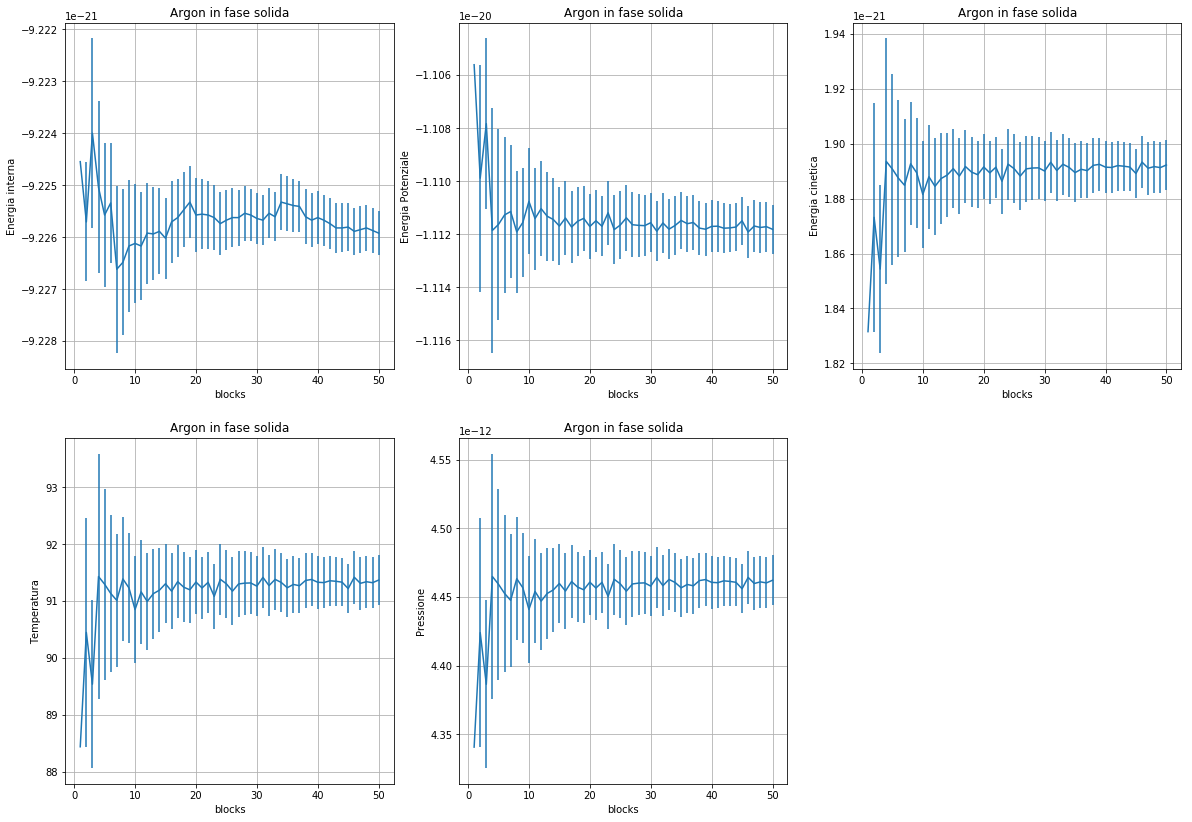

In [7]:
plt.figure(figsize=(20,14))
plt.subplot(2, 3, 1)
plt.errorbar(blocks, list(Ar_E_solid.iloc[:,0]), yerr=list(Ar_E_solid.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Energia interna')
plt.title('Argon in fase solida')
plt.grid(True)
plt.subplot(2, 3, 2)
plt.errorbar(blocks, list(Ar_U_solid.iloc[:,0]), yerr=list(Ar_U_solid.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Energia Potenziale')
plt.title('Argon in fase solida')
plt.grid(True)
plt.subplot(2, 3, 3)
plt.errorbar(blocks, list(Ar_K_solid.iloc[:,0]), yerr=list(Ar_K_solid.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Energia cinetica')
plt.title('Argon in fase solida')
plt.grid(True)
plt.subplot(2, 3, 4)
plt.errorbar(blocks, list(Ar_T_solid.iloc[:,0]), yerr=list(Ar_T_solid.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Temperatura')
plt.title('Argon in fase solida')
plt.grid(True)
plt.subplot(2, 3, 5)
plt.errorbar(blocks, list(Ar_P_solid.iloc[:,0]), yerr=list(Ar_P_solid.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Pressione')
plt.title('Argon in fase solida')
plt.grid(True)

#### Argon in fase liquida

In [8]:
E_liquid=pd.read_csv('liquid/ave_etot',sep=' ',header=None)
U_liquid=pd.read_csv('liquid/ave_epot',sep=' ', header=None)
K_liquid=pd.read_csv('liquid/ave_ekin',sep=' ', header=None)
T_liquid=pd.read_csv('liquid/ave_temp',sep=' ', header=None)
P_liquid=pd.read_csv('liquid/ave_pressure',sep=' ', header=None)

Ar_E_liquid=E_liquid*120*k_b
Ar_U_liquid=U_liquid*120*k_b
Ar_K_liquid=K_liquid*120*k_b
Ar_T_liquid=T_liquid*120
Ar_P_liquid=P_liquid*120*k_b/0.34e-9

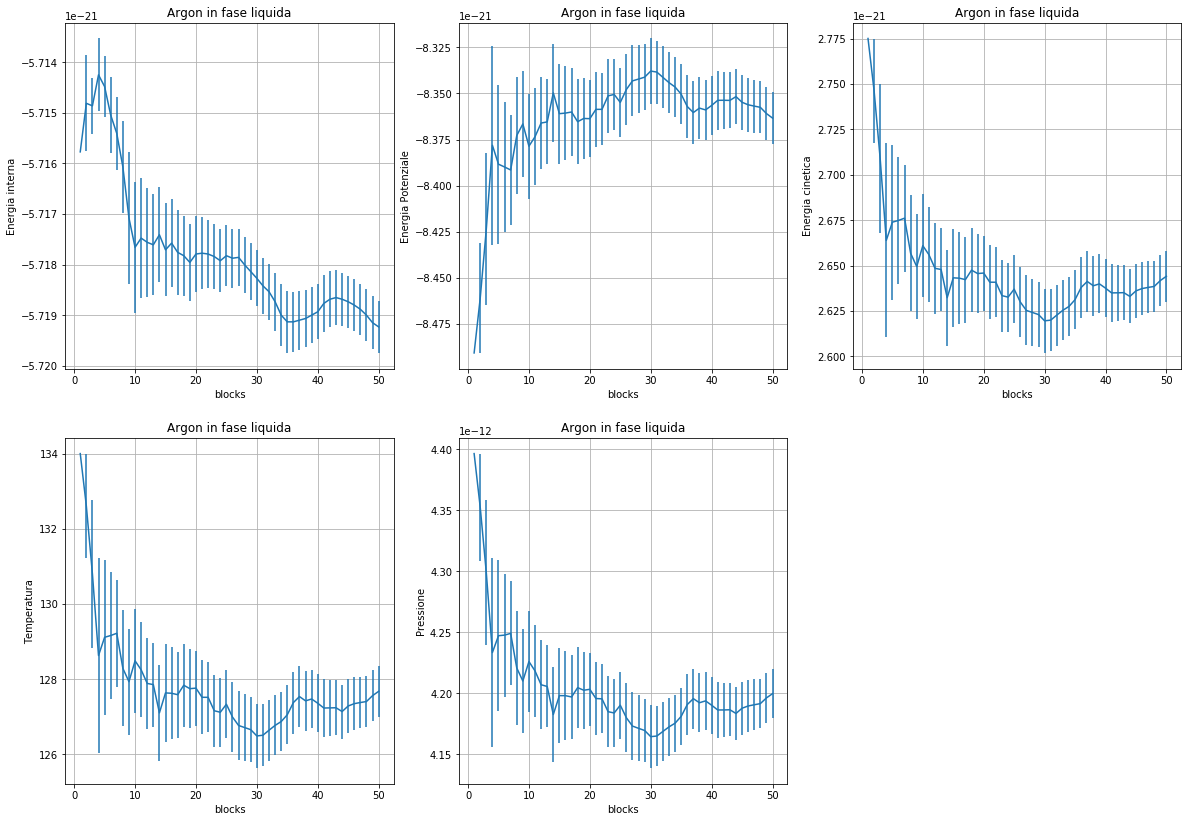

In [9]:
plt.figure(figsize=(20,14))
plt.subplot(2, 3, 1)
plt.errorbar(blocks, list(Ar_E_liquid.iloc[:,0]), yerr=list(Ar_E_liquid.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Energia interna')
plt.title('Argon in fase liquida')
plt.grid(True)
plt.subplot(2, 3, 2)
plt.errorbar(blocks, list(Ar_U_liquid.iloc[:,0]), yerr=list(Ar_U_liquid.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Energia Potenziale')
plt.title('Argon in fase liquida')
plt.grid(True)
plt.subplot(2, 3, 3)
plt.errorbar(blocks, list(Ar_K_liquid.iloc[:,0]), yerr=list(Ar_K_liquid.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Energia cinetica')
plt.title('Argon in fase liquida')
plt.grid(True)
plt.subplot(2, 3, 4)
plt.errorbar(blocks, list(Ar_T_liquid.iloc[:,0]), yerr=list(Ar_T_liquid.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Temperatura')
plt.title('Argon in fase liquida')
plt.grid(True)
plt.subplot(2, 3, 5)
plt.errorbar(blocks, list(Ar_P_liquid.iloc[:,0]), yerr=list(Ar_P_liquid.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Pressione')
plt.title('Argon in fase liquida')
plt.grid(True)

#### Argon in fase Gassosa

In [10]:
E_gas=pd.read_csv('gas/ave_etot',sep=' ',header=None)
U_gas=pd.read_csv('gas/ave_epot',sep=' ', header=None)
K_gas=pd.read_csv('gas/ave_ekin',sep=' ', header=None)
T_gas=pd.read_csv('gas/ave_temp',sep=' ', header=None)
P_gas=pd.read_csv('gas/ave_pressure',sep=' ', header=None)

Ar_E_gas=E_liquid*120*k_b
Ar_U_gas=U_liquid*120*k_b
Ar_K_gas=K_liquid*120*k_b
Ar_T_gas=T_liquid*120
Ar_P_gas=P_liquid*120*k_b/0.34e-9

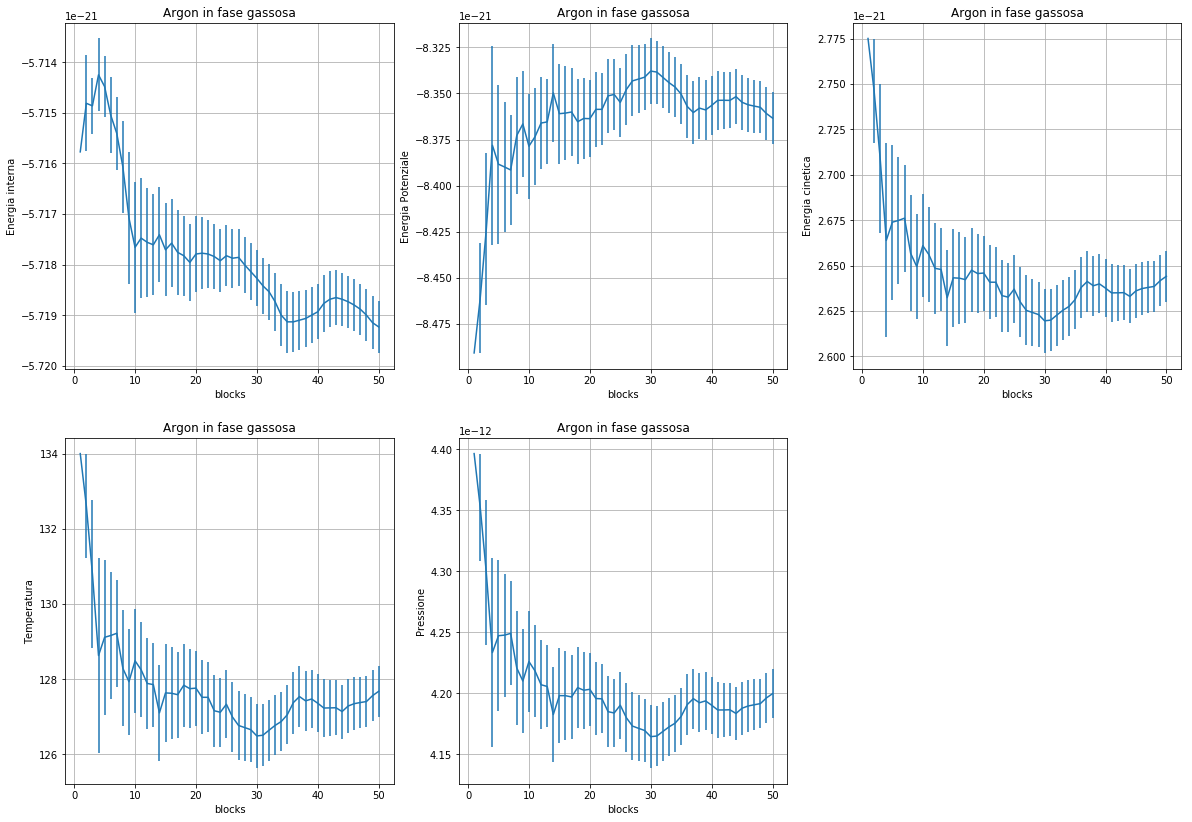

In [11]:
plt.figure(figsize=(20,14))
plt.subplot(2, 3, 1)
plt.errorbar(blocks, list(Ar_E_gas.iloc[:,0]), yerr=list(Ar_E_gas.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Energia interna')
plt.title('Argon in fase gassosa')
plt.grid(True)
plt.subplot(2, 3, 2)
plt.errorbar(blocks, list(Ar_U_gas.iloc[:,0]), yerr=list(Ar_U_gas.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Energia Potenziale')
plt.title('Argon in fase gassosa')
plt.grid(True)
plt.subplot(2, 3, 3)
plt.errorbar(blocks, list(Ar_K_gas.iloc[:,0]), yerr=list(Ar_K_gas.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Energia cinetica')
plt.title('Argon in fase gassosa')
plt.grid(True)
plt.subplot(2, 3, 4)
plt.errorbar(blocks, list(Ar_T_gas.iloc[:,0]), yerr=list(Ar_T_gas.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Temperatura')
plt.title('Argon in fase gassosa')
plt.grid(True)
plt.subplot(2, 3, 5)
plt.errorbar(blocks, list(Ar_P_gas.iloc[:,0]), yerr=list(Ar_P_gas.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Pressione')
plt.title('Argon in fase gassosa')
plt.grid(True)

#### Krypton in fase solida

In [12]:
Kr_E_solid=E_solid*164*k_b
Kr_U_solid=U_solid*164*k_b
Kr_K_solid=K_solid*164*k_b
Kr_T_solid=T_solid*164
Kr_P_solid=P_solid*164*k_b/0.364e-9

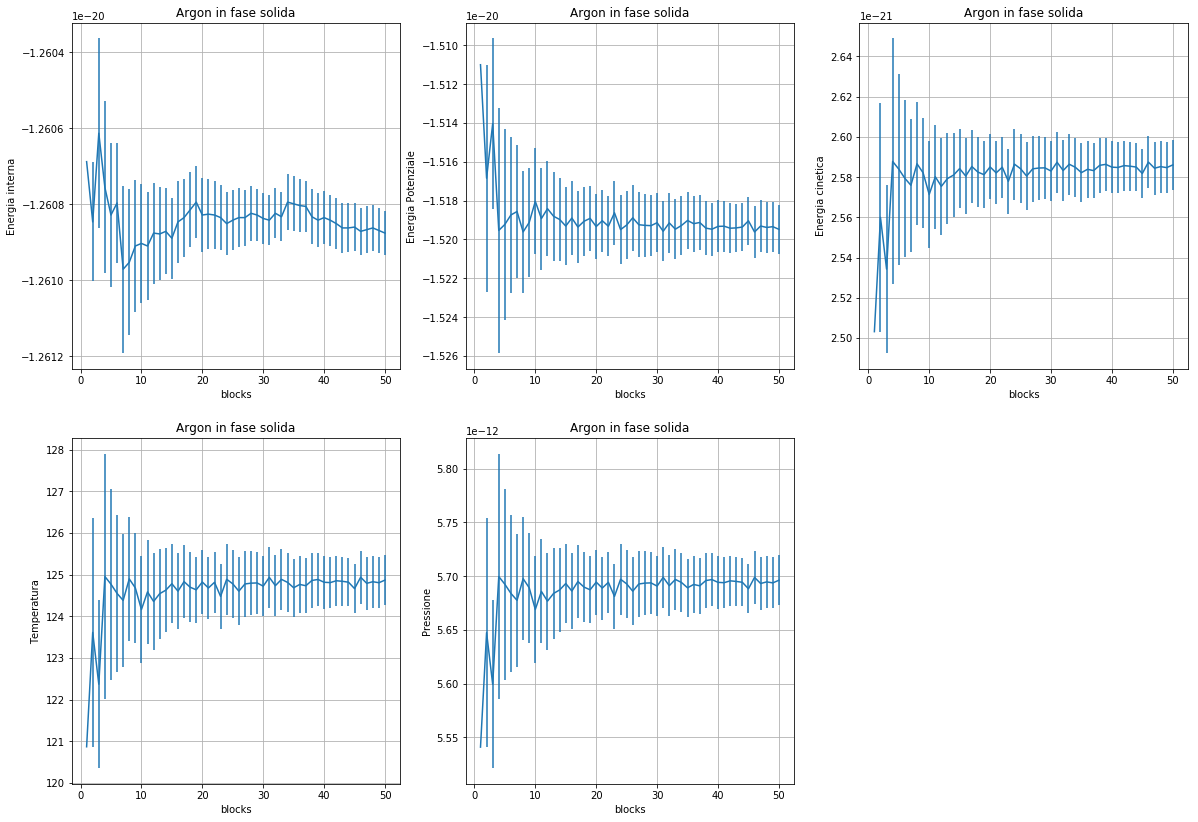

In [13]:
plt.figure(figsize=(20,14))
plt.subplot(2, 3, 1)
plt.errorbar(blocks, list(Kr_E_solid.iloc[:,0]), yerr=list(Kr_E_solid.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Energia interna')
plt.title('Argon in fase solida')
plt.grid(True)
plt.subplot(2, 3, 2)
plt.errorbar(blocks, list(Kr_U_solid.iloc[:,0]), yerr=list(Kr_U_solid.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Energia Potenziale')
plt.title('Argon in fase solida')
plt.grid(True)
plt.subplot(2, 3, 3)
plt.errorbar(blocks, list(Kr_K_solid.iloc[:,0]), yerr=list(Kr_K_solid.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Energia cinetica')
plt.title('Argon in fase solida')
plt.grid(True)
plt.subplot(2, 3, 4)
plt.errorbar(blocks, list(Kr_T_solid.iloc[:,0]), yerr=list(Kr_T_solid.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Temperatura')
plt.title('Argon in fase solida')
plt.grid(True)
plt.subplot(2, 3, 5)
plt.errorbar(blocks, list(Kr_P_solid.iloc[:,0]), yerr=list(Kr_P_solid.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Pressione')
plt.title('Argon in fase solida')
plt.grid(True)

#### Krypton in fase liquida

In [71]:
Kr_E_liquid=E_liquid*164*k_b
Kr_U_liquid=U_liquid*164*k_b
Kr_K_liquid=K_liquid*164*k_b
Kr_T_liquid=T_liquid*164
Kr_P_liquid=P_liquid*164*k_b/0.364e-9

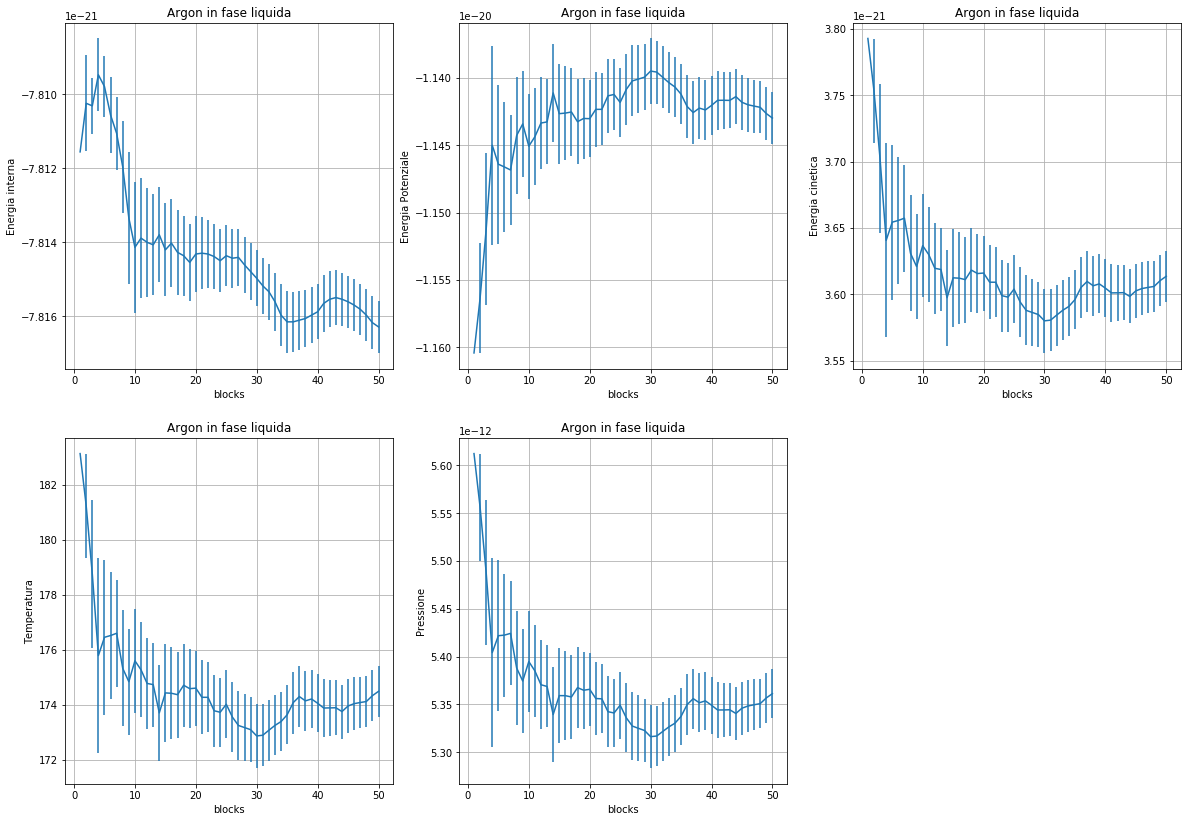

In [72]:
plt.figure(figsize=(20,14))
plt.subplot(2, 3, 1)
plt.errorbar(blocks, list(Kr_E_liquid.iloc[:,0]), yerr=list(Kr_E_liquid.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Energia interna')
plt.title('Argon in fase liquida')
plt.grid(True)
plt.subplot(2, 3, 2)
plt.errorbar(blocks, list(Kr_U_liquid.iloc[:,0]), yerr=list(Kr_U_liquid.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Energia Potenziale')
plt.title('Argon in fase liquida')
plt.grid(True)
plt.subplot(2, 3, 3)
plt.errorbar(blocks, list(Kr_K_liquid.iloc[:,0]), yerr=list(Kr_K_liquid.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Energia cinetica')
plt.title('Argon in fase liquida')
plt.grid(True)
plt.subplot(2, 3, 4)
plt.errorbar(blocks, list(Kr_T_liquid.iloc[:,0]), yerr=list(Kr_T_liquid.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Temperatura')
plt.title('Argon in fase liquida')
plt.grid(True)
plt.subplot(2, 3, 5)
plt.errorbar(blocks, list(Kr_P_liquid.iloc[:,0]), yerr=list(Kr_P_liquid.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Pressione')
plt.title('Argon in fase liquida')
plt.grid(True)

In [ ]:
#### Krypton in fase gassosa

In [73]:
Kr_E_gas=E_gas*164*k_b
Kr_U_gas=U_gas*164*k_b
Kr_K_gas=K_gas*164*k_b
Kr_T_gas=T_gas*164
Kr_P_gas=P_gas*164*k_b/0.364e-9

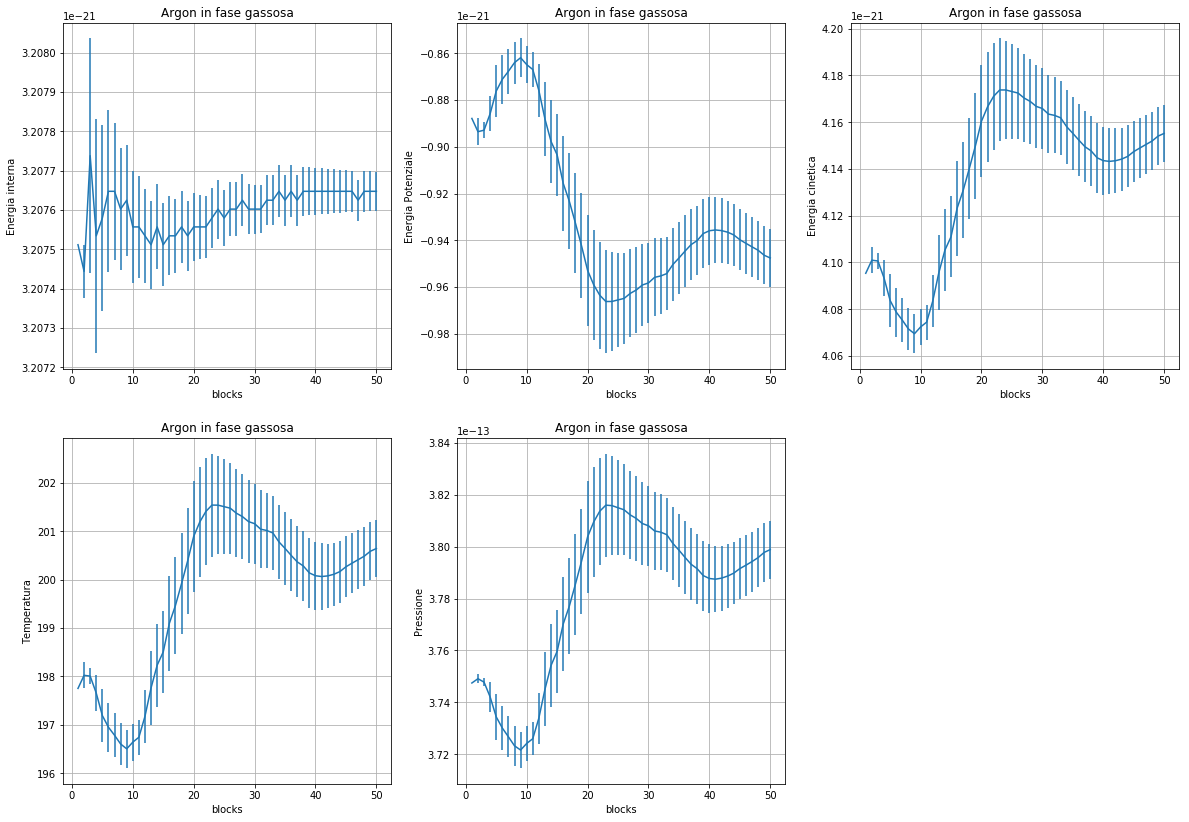

In [74]:
plt.figure(figsize=(20,14))
plt.subplot(2, 3, 1)
plt.errorbar(blocks, list(Kr_E_gas.iloc[:,0]), yerr=list(Kr_E_gas.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Energia interna')
plt.title('Argon in fase gassosa')
plt.grid(True)
plt.subplot(2, 3, 2)
plt.errorbar(blocks, list(Kr_U_gas.iloc[:,0]), yerr=list(Kr_U_gas.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Energia Potenziale')
plt.title('Argon in fase gassosa')
plt.grid(True)
plt.subplot(2, 3, 3)
plt.errorbar(blocks, list(Kr_K_gas.iloc[:,0]), yerr=list(Kr_K_gas.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Energia cinetica')
plt.title('Argon in fase gassosa')
plt.grid(True)
plt.subplot(2, 3, 4)
plt.errorbar(blocks, list(Kr_T_gas.iloc[:,0]), yerr=list(Kr_T_gas.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Temperatura')
plt.title('Argon in fase gassosa')
plt.grid(True)
plt.subplot(2, 3, 5)
plt.errorbar(blocks, list(Kr_P_gas.iloc[:,0]), yerr=list(Kr_P_gas.iloc[:,1]))
plt.xlabel('blocks')
plt.ylabel('Pressione')
plt.title('Argon in fase gassosa')
plt.grid(True)